<img src="https://upload.wikimedia.org/wikipedia/fr/b/bf/Universit%C3%A9_Laval_logo_et_texte.svg" width=600 align="right"><br>
<b> Physique numérique PHY-3500 </b><br>
<b> Physique, génie physique et optique </b><br>
<b> Hiver 2026 </b><br>
<b> Université Laval </b><br>


<h1><center> Travail Pratique 1 </center></h1>


## Identification
- Éloi Blouin : 536 999 917
- Clément Poulin : 536 994 304

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
plt.rcParams.update({'font.size': 14})
from ipywidgets import *
import types

## Instructions pour la remise

Le travail devra être complété en trinômes sous format de cahier de bord jupyter (.ipynb) et remis dans la boîte de dépôt créée à cette fin. Ce document contiendra toutes informations pertinentes permettant au lecteur d'apprécier vos résultats et conclusions, incluant le code Python utilisé et d'éventuelles références bibliographiques. La qualité de la présentation est très importante (utilisation de sections, de graphiques appropriés, de mise en contexte, etc.).

Prenez soin de bien indiquer votre (ou vos) nom(s) dans le cahier de bord. Pour faciliter la tâche de classification, utilisez la nomenclature suivante pour le fichier transmis (un seul) :

TPn_nom1_nom2_nom3.ipynb

## Objectif

Déterminer la portée des protons dans matière par des méthodes d'intégration numérique. Se familiariser avec la protonthérapie.

## Introduction

La radiothérapie externe par faisceaux de rayons X , d'électrons ou de hadrons a pour but de détruire des cellules pathologiques (cancer par exemple) tout en épargnant les tissus sains environnants. L'éradication des cellules tumorales est effectuée par des dépôts d'énergies élevés lors du passage des photons/électrons/hadrons dans la matière (le corps). Pour effectuer des traitements optimaux, il convient d'adapter les faisceaux à la tumeur (forme, profondeur) pour administer la dose prescrite à la structure cible tout en préservant au maximum les tissus sains. La balistique doit être adéquate et optimisée au cas clinique à traiter et le physicien médical est le garant de la dose administrée aux volumes cibles et aux organes à risque. Le physicien médical est en quelque sorte le pharmacien de la radiation, étant responsable de son dosage.

La protonthérapie est une technique avancée de radiothérapie externe qui utilise des faisceaux de protons à des fins thérapeutiques. Elle est utilisée dans quelques dizaines de centres à travers le monde ${ }^{1}$. TRIUMF ${ }^{2}$ à Vancouver est le centre de référence au Canada en protonthérapie. Ce centre est en mesure de traiter des tumeurs peu profondes car la ligne de faisceau médicale permet des énergies de protons relativement faibles. Néanmoins, cette technologie est très efficace pour traiter certains mélanomes oculaires car les protons ont l'avantage de mieux préserver les tissus environnants, grâce à une balistique de traitement optimale. Ainsi, les patients peuvent être soignés sans que le nerf optique reçoive une dose de rayonnement trop grande, ce qui pourrait causer la cécité.

1. http://www.ptcog.ch/
2. http://www.triumf.ca/proton-therapy

On comprend qu'il est vital de pouvoir prédire et planifier la dose reçue par le patient. Dans ce contexte, la détermination de la portée des protons dans la matière en est le premier pas.

## Pouvoir d'arrêt collisionnel des protons

Le formalisme associé au pouvoir d'arrêt collisionnel (ou électronique) fut pour la première fois énoncé par Bethe en 1933 suite à un développement perturbatif en mécanique quantique sous l'approximation de Born au premier ordre. Il permet de calculer la perte d'énergie par unité de distance d'une particule chargée dans un milieu donné. Des développements additionnels ont été réalisés par Barkas et Bloch afin de tenir compte des limites de cette approximation au-delà du premier ordre ${ }^{3}$. Ces termes d'ordre supérieur deviennent significatifs pour des ions de faible vitesse. Le pouvoir d'arrêt collisionnel massique s'exprime par

$$
\begin{equation*}
\frac{S_{c o l}}{\rho}=-\left(\frac{d T}{\rho d x}\right)_{c o l}=N Z \int_{0}^{T_{e}^{\max }} T^{\prime}\left(\frac{d \sigma}{d T^{\prime}}\right)_{c o l} d T^{\prime} \tag{1}
\end{equation*}
$$

où

- $\frac{d \sigma}{d T}$ est la section efficace différentielle pour les collisions inélastiques résultant d'une énergie transférée $T^{\prime}$,
- $N$ est le nombre d'atomes par gramme,
- $T^{\prime}$ est l'énergie transférée à l'électron de l'atome,
- $T_{e}^{m a x}$ est l'énergie maximale transférable à un électron par le proton :

$$
\begin{equation*}
T_{e}^{\max }=\frac{2 m_{e} c^{2}\left(\gamma^{2}-1\right)}{1+2 \gamma \frac{m_{e}}{m_{p}}+\left(\frac{m_{e}}{m_{p}}\right)^{2}} \tag{2}
\end{equation*}
$$

avec $\gamma$ représentant le facteur de Lorentz, $m_{p}$ et $m_{e}$ étant respectivement les énergies de masse du proton et de l'électron.

Avec la correction du modèle en couches, d'effet de la polarisation et des corrections d'ordres supérieurs en $Z$, on obtient le pouvoir d'arrêt collisionnel pour les protons:

$$
\begin{equation*}
-\left(\frac{d T}{d x}\right)_{c o l}=2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \frac{Z^{2}}{\beta^{2}}\left[\ln \left(\frac{2 m_{e} c^{2}\left(\gamma^{2}-1\right) T_{e}^{\max }}{I^{2}}\right)-2 \beta^{2}-\delta-2 \frac{C}{Z}+2 Z L_{1}+2 Z^{2} L_{2}\right], \tag{3}
\end{equation*}
$$

avec

- $r_{e}$ le rayon classique de l'électron,
- $n_{e}$ la densité électronique du matériau,
- $Z$ la charge de la particule ( $Z=1$ pour les protons),
- $I$ l'énergie moyenne d'excitation du matériau, accessible sur [?],
- $\beta$ et $\gamma$ les facteurs de Lorentz,
- $\delta$ un terme considérant les effets de la polarisation,
- $2 \frac{C}{Z}$ un terme corrigeant des effets du modèle en couches du cortège électronique atomique,
- $Z L_{1}$ la correction de Barkas, souvent nommée d'ordre 1 en Z mais, qui en réalité, induit une dépendance en $Z^{3}$,
- $Z^{2} L_{2}$ la correction de Bloch, nommée d'ordre 2 en Z d'où une dépendance en $Z^{4}$.

Il est d'usage de négliger les termes correctifs pour les protons de plus de $\mathbf{3 ~ M e V}$ en protonthérapie, ce qui mène à

$$
\begin{equation*}
S_{c o l}(T)=2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \frac{1}{\beta^{2}}\left[\ln \left(\frac{\left.2 m_{e} c^{2} \beta^{2} \gamma^{2} T_{e}^{\max }\right)}{I^{2}}\right)-2 \beta^{2}\right] \tag{4}
\end{equation*}
$$

Dans cet expression, le matériau dans lequel se propage la particule chargée est défini par les termes $n_{e}$ et $I$ seulement. Ce modèle explique bien les données expérimentales pour les protons de plus de 3 MeV ; aussi, dans ce TP, on utilisera cette valeur comme borne d'intégration. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

Les particules chargées se propageant dans la matière peuvent aussi engendrer des interactions nucléaires et subir des pertes radiatives (surtout pour les particules légères comme les électrons) mais dans ce TP, seul le pouvoir d'arrêt collisionnel (électronique) sera considéré.

En général, les accélérateurs dédiés à la protonthérapie produisent des faisceaux de particules dans la gamme $70-250 \mathrm{MeV}$. En première appoximation, on peut considérer les humains comme étant constitués d'eau liquide.


## Questions 1.
Exprimez la densité électronique $n_{e}$ d'un milieu en fonction de sa composition atomique et de sa masse volumique $\rho$, et calculer $n_{e}$ pour l'eau (liquide) et l'os compact (définition de l'ICRU). On s'appuiera sur les données du NIST ${ }^{4}$ pour les compositions atomiques de ces matériaux. Vous trouverez aussi les énergies moyennes d'excitation $I$ de ces matériaux sur le site du NIST. Tracez les courbes des pouvoirs d'arrêt collisionnel pour ces milieux. On utilisera une échelle logarithmique en abscisse.

Le nombre d'électrons dans un échantillon est la somme du nombre d'électrons que possède chaque élément constituant l'échantillon. Un échantillon ne contenant que de l'hydrogène ne possède que $N$ électrons, où $N$ est aussi le nombre d'atomes d'hydrogène contenus dans l'échantillon. Dans une mole, il y a un nombre d'Avogadro $N_A$ d'atomes.

Le nombre d'électrons par gramme d'un élément $i$ est
$$
n_i = \cfrac{N_A Z_i}{A_i}
$$

avec $Z_i$ le nombre d'électrons de l'élément $i$, i.e. son numéro atomique, et $A_i$ la masse molaire de cet élément.

Dans un échantillon, le nombre d'électrons total est donc
$$
n = N_A\sum_i\omega_i\cfrac{Z_i}{A_i}
$$

où $\omega_i$ est la fraction massique de chaque élément.

La densité électronique est alors
$$
n_e = \rho N_A\sum_i\omega_i\cfrac{Z_i}{A_i}
$$

In [ ]:
def calculate_n_e(rho: float, w_is: np.ndarray, Z_is: np.ndarray, A_is: np.ndarray) -> float:
    """
    Calculates the electronic density of a given material based on its mass density and atomic constituants

    :param rho: mass density of the material
    :param w_is: mass fractions of the constituant elements
    :param Z_is: atomic numbers of the constituant elements
    :param A_is: atomic masses of the constituant elements

    :return: electronic density of the material
    :rtype: float
    """
    # asserts
    try:
        assert isinstance(w_is, np.ndarray)
        assert isinstance(Z_is, np.ndarray)
        assert isinstance(A_is, np.ndarray)
    except Exception as e:
        print(e)

    # calculate n_e
    return rho * 6.022e23 * np.sum(w_is * (Z_is / A_is))


def calculate_lorentz_factors(T: np.ndarray) -> list[np.ndarray, np.ndarray]:
    """
    calculates the lorentz beta and gamma factors for a proton with a given kinetic energy T

    :param T: kinetic energy of the proton [MeV]

    :return: lorentz beta and gamma factors
    :rtype: list[np.ndarray, np.ndarray]
    """
    # asserts
    assert isinstance(T, np.ndarray)

    # Pre-calculate once outside the function
    m_p_mev = (cte.m_p * cte.c**2) / (cte.e * 1e6)

    # calculate lorentz factors
    gamma = 1 + T / m_p_mev
    beta = np.sqrt(1 - 1 / gamma ** 2)

    return [beta, gamma]


def calculate_S_col(n_e: float, I: float, T: np.ndarray) -> np.ndarray:
    """
    calculates the collisional stopping power of a specified material

    :param n_e: electronic density of the material
    :param I: mean excitation energy of the material
    :param T: 

    :return: numpy array of the collisional stopping power
    :rtype: np.ndarray
    """
    # asserts
    assert isinstance(n_e, float)
    assert isinstance(I, float)
    assert isinstance(T, np.ndarray)

    # calculate constants
    r_e = cte.physical_constants['classical electron radius'][0]
    beta, gamma = calculate_lorentz_factors(T=T)
    m_p_mev = (cte.m_p * cte.c**2) / (cte.e * 1e6)
    m_e_mev = (cte.m_e * cte.c**2) / (cte.e * 1e6)

    T_e_max = (2 * m_e_mev * cte.c ** 2 * (gamma ** 2 - 1)) / (1 + 2 * gamma * (m_e_mev / m_p_mev) + (m_e_mev / m_p_mev) ** 2)

    # calculate S_col
    return 2 * cte.pi * (r_e ** 2) * m_e_mev * (cte.c ** 2) * n_e * (1 / (beta ** 2)) * (np.log((2 * m_e_mev * (cte.c ** 2) * (beta ** 2) * (gamma ** 2) * T_e_max) / (I ** 2)) - 2 * (beta ** 2))

In [45]:
# water data
water_density = 1.00000E+00                # [g/cm^3]
water_mean_excitation_energy = 75.00e-6    # [MeV]

water_Z_is = np.array([1, 8])
water_w_is = np.array([0.111894, 0.888106])
water_A_is = np.array([1.00794, 15.9994])

# bone data
bone_density = 1.85000E+00                # [g/cm^3]
bone_mean_excitation_energy = 91.90e-6    # [MeV]

bone_Z_is = np.array([1, 6, 7, 8, 12, 15, 16, 20])
bone_w_is = np.array([0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
bone_A_is = np.array([1.00794, 12.011, 14.0067, 15.9994, 24.305, 30.97376, 32.066, 40.078])

Ts = np.arange(3, 751, 1)

# calculate n_e for both meterials
water_n_e = calculate_n_e(
    rho=water_density,
    w_is=water_w_is,
    Z_is=water_Z_is,
    A_is=water_A_is
)
bone_n_e = calculate_n_e(
    rho=bone_density,
    w_is=bone_w_is,
    Z_is=bone_Z_is,
    A_is=bone_A_is
)

# calculate S_col for both meterials
water_Scol = calculate_S_col(n_e=water_n_e, I=water_mean_excitation_energy, T=Ts)
bone_Scol = calculate_S_col(n_e=bone_n_e, I=bone_mean_excitation_energy, T=Ts)

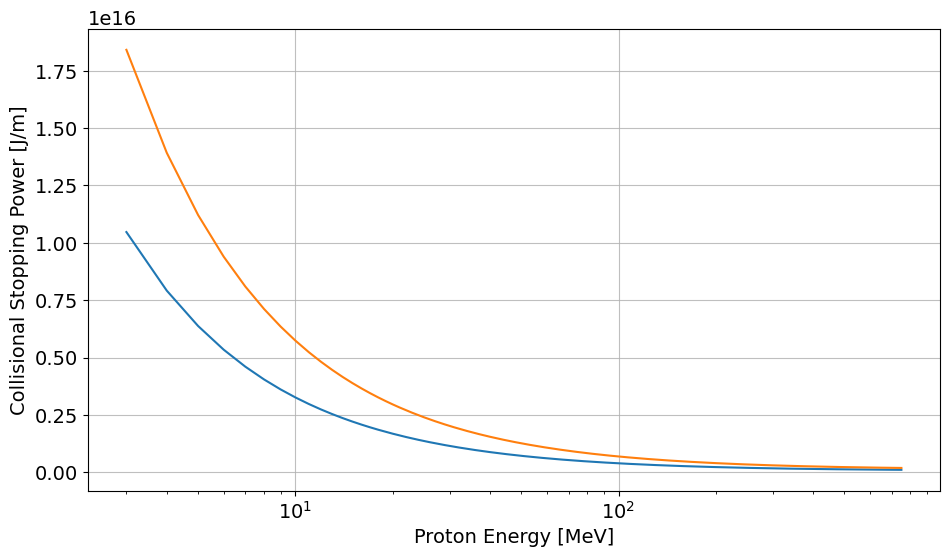

In [46]:
plt.figure(figsize=(11, 6))

plt.plot(Ts, water_Scol)
plt.plot(Ts, bone_Scol)

plt.xlabel("Proton Energy [MeV]")
plt.ylabel("Collisional Stopping Power [J/m]")
plt.xscale('log')

plt.grid(alpha=0.8)
plt.show()

## Portée des protons dans la matière

L'approximation d'une décélération continue (CSDA) des protons dans la matière, en ligne droite, permet de calculer leur portée dans le milieu considéré. La portée par CSDA ( $R_{C S D A}$ ) est obtenue en intégrant l'inverse du pouvoir d'arrêt total par rapport à l'énergie :

$$
\begin{equation*}
R_{C S D A}=\int_{0}^{T_{i}} \frac{\mathrm{dT}^{\prime}}{\frac{S_{c o l}}{\rho}} \tag{5}
\end{equation*}
$$

## Questions 2.
 Déterminer l'homogénéité dimensionnelle de $R_{C S D A}$ et expliquer en quelques phrases ce que représente l'équation 5 .


## Questions 3.
 Justifiez que pour les protons, le pouvoir d'arrêt total est bien approximé par le pouvoir d'arrêt collisionnel aux énergies de la protonthérapie. Discutez des deux autres composantes négligées ici : réactions nucléaires et pertes radiatives. Aide : prendre l'exemple de l'eau et appuyez-vous sur PSTAR du NIST ${ }^{5}$.

## Questions 4.
Justifiez la nécessité d'employer une méthode numérique pour calculer la portée des protons.

## Questions 5. 
Implémenter deux algorithmes d'intégration numérique pour calculer la portée des protons dans l'eau et dans l'os compact; le premier avec la méthode des trapèzes et le second avec la méthode de Simpson. Considérez des protons de 150 MeV . Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d'échantillons (de tranches) considéré. On déterminera à l'avance le nombre de tranches nécessaires pour atteindre une erreur de l'ordre de la précision machine en Python, et on utilisera ce nombre (où un nombre de cet ordre de grandeur) comme valeur maximale (il y aura une valeur maximale pour la méthode des trapèzes et une autre pour la méthode de Simpson). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s'avérer judicieux pour les questions suivantes.

## Questions 6.
Pour une méthode d'intégration numérique au choix, mesurez le temps de calcul en fonction du nombre de tranches $N$. Comparez les résultats obtenus sur au moins deux processeurs (CPU) et commentez les différences observées.


## Questions 7. 
Établir l'expression analytique de la dérivée du pouvoir d'arrêt en fonction de $T$ et la tracer. On utilisera une échelle logarithme en abscisse. Aide : Exprimez le pouvoir d'arrêt en fonction de $\gamma$ et utiliser le théorème de dérivation des fonctions composées. Utilisez aussi les définitions suivantes pour simplifier la notation :
$$
\begin{equation*}
T_{e}^{\max }=\frac{a\left(\gamma^{2}-1\right)}{b+\delta \gamma}, \quad \text { avec } \quad a=2 m_{e} c^{2}, \quad b=1+\left(\frac{m_{e}}{m_{p}}\right)^{2} \quad \text { et } \quad \delta=2 \frac{m_{e}}{m_{p}} . \tag{6}
\end{equation*}
$$
et
$$
\begin{align*}
U & =2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \\
k & =\frac{a^{2}}{I^{2}} \tag{7}
\end{align*}
$$
sachant aussi que
$$
\begin{align*}
& T=(\gamma-1) m_{p} c^{2} \Rightarrow \gamma=\frac{T}{m_{p} c^{2}}+1  \tag{8}\\
& \gamma=\frac{1}{\sqrt{1-\beta^{2}}} \Rightarrow \gamma^{2} \beta^{2}=\left(\gamma^{2}-1\right) \tag{9}
\end{align*}
$$

## Questions 8.
Rapportez vos portées calculées dans un tableau, qui comprendra aussi les erreurs d'approximation calculées (pour la méthode des trapèzes) et évaluées de façon pratique (pour les deux méthodes). Si vous êtes vraiment courageuse ou courageux, vous pourriez aussi calculer les erreurs d'approximation pour Simpson, mais restons-en à l'évaluation pratique de l'erreur pour ce cas. Commentez vos observations.

## Optimisation
Supposons maintenant que l'on cherche à réduire au maximum le temps de calcul, disons pour évaluer en temps quasi-réel la portée de chaque proton individuel émanant de l'accélérateur et dont on connaîtrait précisément l'énergie. Ces protons ont une distribution en énergie pouvant être approximée par une distribution de Moyal, que vous pourrez générer avec scipy.stats. moyal avec les paramètres loc $=150$, scale $=4$ (unités en MeV).
## Questions 9.
Utilisez moyal.rvs pour générer aléatoirement 10000 énergies tirées de cette distribution et tracez-la.


## Questions 10.
À l'aide du module timeit, vous estimerez le nombre de protons que vous pouvez calculer par seconde selon trois méthodes : vos implémentations des méthodes par trapèzes et Simpson ainsi que la fonction scipy.integrate.quad. Utilisez les 10000 valeurs d'énergie générées plus haut pour faire vos tests. Afin de comparer des pommes avec des pommes, vos calculs permettront tous d'atteindre la précision par défaut de la routine scipy.integrate.quad.

## Questions 11.
Faites aussi un histogramme des portées obtenues pour ces 10000 protons et commentez la distribution obtenue.



## Énergie déposée

Il est possible de calculer l'énergie déposée pour un pas de déplacement du proton $s$ dans un milieu comme suit :

$$
\begin{equation*}
s=\int_{T_{f}}^{T_{i}} \frac{\mathrm{dT}^{\prime}}{S_{c o l}} \tag{10}
\end{equation*}
$$

où $T_{i}$ et $T_{f}$ sont les énergies cinétiques respectivement avant et après que le proton ait subi l'atténuation d'épaisseur $s$ du matériau.


## Questions 12.
Écrire un algorithme capable de réaliser le transport des protons subissant une décélération continue dans le milieu et tracer le dépôt d'énergie en fonction de la profondeur pour l'eau et l'os pour des proton d'énergie cinétique 150 MeV (faisceau monoénergétique). Votre courbe comportera un point où l'énergie déposée est nulle. La position de ce point est-elle conforme à vos résultats antérieurs sur la portée? Qu'est-ce qui influence sa valeur?

## Questions 13.
On nomme cette courbe le pic de Bragg. En déduire l'intérêt des protons pour la radiothérapie.

## Questions 14.
Tracez la portée $R_{C S D A}$ des protons dans l'eau en fonction de l'énergie cinétique $T$ pour $50 \leq T \leq 200 \mathrm{MeV}$. Indiquez sur le graphique la profondeur $D=4 \mathrm{~cm}$ et déterminez graphiquement l'énergie du faisceau nécessaire pour atteindre cette profondeur.

## Questions 15.
En quoi les protons sont-ils préférables aux photons pour traiter un mélanome oculaire?

## Questions 16.
Dans l'approche développée ici, les protons vont essentiellement en ligne droite dans la matière. Est-ce réaliste? Que devra-t-on éventuellement ajouter à notre modèle?

Références


3. voir détails à https://en.wikipedia.org/wiki/Bethe_formula
4. voir https://physics.nist.gov/cgi-bin/Star/compos.pl?ap
5. http://physics.nist.gov/PhysRefData/Star/Text/PSTAR.html